In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/macro_monthly.csv"
df = pd.read_csv(path)

In [10]:
df.head()

,Year,Month,Industrial_Production,Manufacturers_New_Orders: Durable Goods,Consumer_Price Index,Unemployment_Rate,Retail_Sales,Producer_Price_Index,Personal_Consumption_Expenditures,National_Home_Price_Index,All_Employees(Total_Nonfarm),Labor_Force_Participation_Rate,Federal_Funds_Effective_Rate,Building_Permits,Money_Supply_(M2),Personal_Income,Trade_Balance,Consumer_Sentiment,Consumer_Confidence
0,1993,1,0.39,-3.52,0.35,-1.35,1.16,0.34,0.24,0.14,0.26,-0.15,-0.51,0.09,-0.16,-2.51,30.91,-1.87,-1.87
1,1993,2,0.48,5.93,0.21,-2.74,-0.78,0.34,0.15,0.07,0.23,0.00,0.59,-2.46,-0.13,0.61,7.10,-3.02,-3.02
2,1993,3,-0.10,-1.62,0.14,-1.41,-0.83,0.25,0.20,0.04,-0.04,0.00,0.40,-8.01,-0.08,-0.05,-88.46,-0.81,-0.81
3,1993,4,0.28,0.50,0.35,1.43,2.58,0.51,0.27,0.09,0.27,-0.15,-0.34,4.55,-0.01,1.02,4.90,-0.35,-0.35
4,1993,5,-0.37,-0.68,0.28,0.00,0.95,0.34,0.31,0.13,0.25,0.45,-0.30,0.72,0.75,0.29,32.21,-6.19,-6.19


<ipython-input-12-6b1fc3af9341>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(conditional_data.keys()), y=list(conditional_data.values()), ax=ax3, palette=['#F4A261', '#2A9D8F'])


Analysis dashboard saved as 'FEAC_Analysis_Dashboard.png'


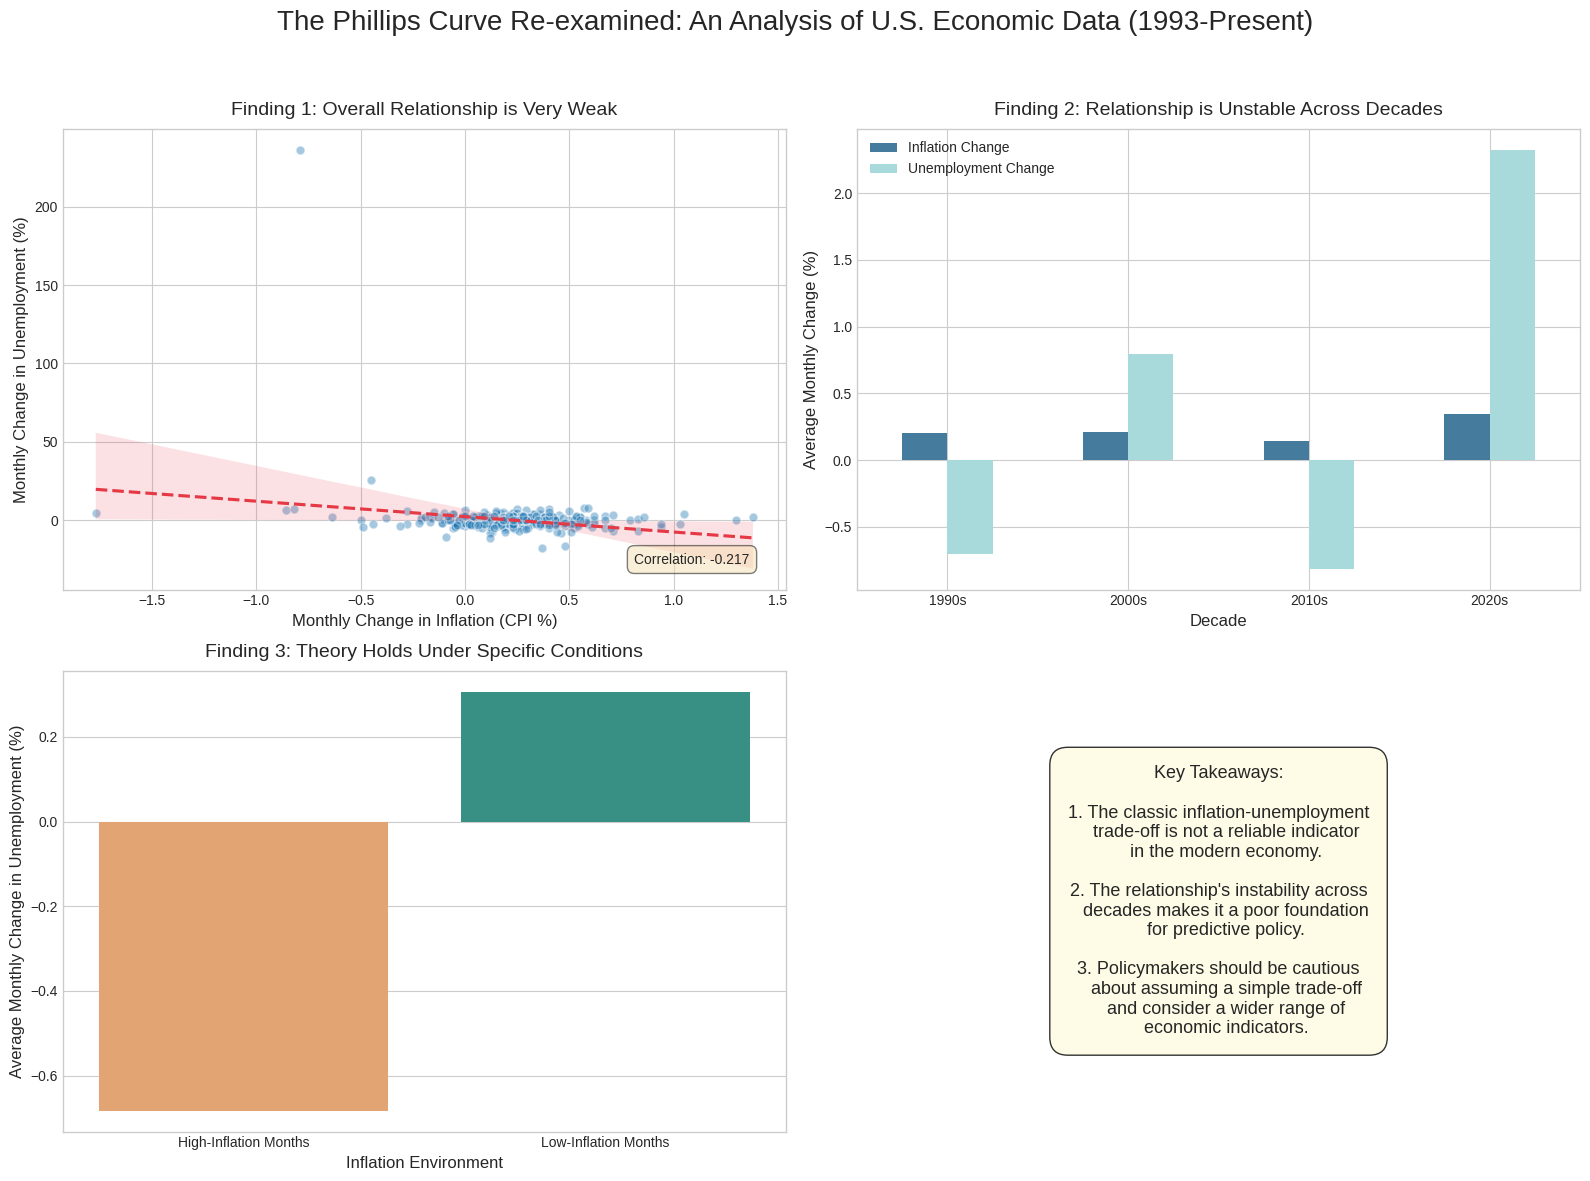

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Clean the column name for easier access
df.rename(columns={'Consumer_Price Index': 'Consumer_Price_Index'}, inplace=True)

# Create a 'Decade' column for grouping
def assign_decade(year):
    if 1993 <= year <= 1999:
        return '1990s'
    elif 2000 <= year <= 2009:
        return '2000s'
    elif 2010 <= year <= 2019:
        return '2010s'
    else:
        return '2020s'
df['Decade'] = df['Year'].apply(assign_decade)


# --- 2. Create the Visualization Dashboard ---
# Set a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('The Phillips Curve Re-examined: An Analysis of U.S. Economic Data (1993-Present)', fontsize=20, y=0.98)

# --- Plot 1: The Overall Relationship (Scatter Plot) ---
ax1 = axes[0, 0]
sns.regplot(x='Consumer_Price_Index', y='Unemployment_Rate', data=df, ax=ax1,
            scatter_kws={'alpha':0.4, 'edgecolor':'w', 's':40},
            line_kws={'color':'#E63946', 'linestyle':'--'})
ax1.set_title('Finding 1: Overall Relationship is Very Weak', fontsize=14, pad=10)
ax1.set_xlabel('Monthly Change in Inflation (CPI %)', fontsize=12)
ax1.set_ylabel('Monthly Change in Unemployment (%)', fontsize=12)
# Add annotation for the weak correlation
correlation = df['Consumer_Price_Index'].corr(df['Unemployment_Rate'])
ax1.text(0.95, 0.05, f'Correlation: {correlation:.3f}',
         transform=ax1.transAxes, ha='right', va='bottom',
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


# --- Plot 2: Instability Across Decades (Bar Chart) ---
ax2 = axes[0, 1]
decade_analysis = df.groupby('Decade')[['Consumer_Price_Index', 'Unemployment_Rate']].mean()
decade_analysis.plot(kind='bar', ax=ax2, color=['#457B9D', '#A8DADC'])
ax2.set_title('Finding 2: Relationship is Unstable Across Decades', fontsize=14, pad=10)
ax2.set_ylabel('Average Monthly Change (%)', fontsize=12)
ax2.set_xlabel('Decade', fontsize=12)
ax2.tick_params(axis='x', rotation=0)
ax2.legend(['Inflation Change', 'Unemployment Change'])


# --- Plot 3: The Conditional Relationship (Bar Chart) ---
ax3 = axes[1, 0]
high_inflation_threshold = 0.5
avg_unemployment_in_high_inflation = df[df['Consumer_Price_Index'] > high_inflation_threshold]['Unemployment_Rate'].mean()
avg_unemployment_in_low_inflation = df[df['Consumer_Price_Index'] <= high_inflation_threshold]['Unemployment_Rate'].mean()
conditional_data = {'High-Inflation Months': avg_unemployment_in_high_inflation,
                    'Low-Inflation Months': avg_unemployment_in_low_inflation}
sns.barplot(x=list(conditional_data.keys()), y=list(conditional_data.values()), ax=ax3, palette=['#F4A261', '#2A9D8F'])
ax3.set_title('Finding 3: Theory Holds Under Specific Conditions', fontsize=14, pad=10)
ax3.set_ylabel('Average Monthly Change in Unemployment (%)', fontsize=12)
ax3.set_xlabel('Inflation Environment', fontsize=12)


# --- Plot 4: Key Takeaways (Text Summary) ---
ax4 = axes[1, 1]
ax4.axis('off') # Hide the axes
summary_text = (
    "Key Takeaways:\n\n"
    "1. The classic inflation-unemployment\n"
    "   trade-off is not a reliable indicator\n"
    "   in the modern economy.\n\n"
    "2. The relationship's instability across\n"
    "   decades makes it a poor foundation\n"
    "   for predictive policy.\n\n"
    "3. Policymakers should be cautious\n"
    "   about assuming a simple trade-off\n"
    "   and consider a wider range of\n"
    "   economic indicators."
)
ax4.text(0.5, 0.5, summary_text, ha='center', va='center', fontsize=13, wrap=True,
         bbox=dict(boxstyle='round,pad=1', fc='#FEFAE0', alpha=0.8))


# Final adjustments and saving the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('FEAC_Analysis_Dashboard.png', dpi=300)

print("Analysis dashboard saved as 'FEAC_Analysis_Dashboard.png'")